In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 載入股價的訓練資料集與驗證資料集
df_train = pd.read_csv("Intel_dataset_train_new.csv", index_col="Date",parse_dates=True)
df_val=pd.read_csv('Intel_dataset_val.csv', index_col="Date",parse_dates=True)
print(df_train.head())
print(df_val.head())

FileNotFoundError: ignored

In [ ]:
# 倒數第二格是希望模型預測的結果，因此把一般的收盤價 close 去除
df2 = df_train
df2 = df2.drop(columns=['Close'])

# 把因為處理的方便性，因此我要調換一下順續
# 先拿到 column list
cols = df2.columns.to_list()
# 交換 column 順序
cols = cols[5:11] + cols[:3] + cols[4:5] + cols[3:4]
# 套用新的 column 順序
df2 = df2[cols]

# 調換順序後的df2
df2

,SOX,COMEX,OilFut,Volatility,USDINDEX,Open,High,Low,Volume,Adj Close
Date,,,,,,,,,,
2015-01-02,686.7,1186.2,52.69,17.79,91.08,36.669998,37.160000,36.110001,23605600,28.270075
2015-01-05,673.6,1204.0,50.04,19.92,91.38,36.200001,36.450001,35.939999,32785000,27.951288
2015-01-06,658.8,1219.4,47.93,21.12,91.50,36.080002,36.230000,35.259998,30847600,27.430363
2015-01-07,665.3,1210.7,48.65,19.31,91.89,35.639999,36.070000,35.270000,27725200,28.005720
2015-01-08,684.6,1208.5,48.79,17.01,92.37,36.369999,37.000000,36.259998,31765400,28.526644
...,...,...,...,...,...,...,...,...,...,...
2021-06-24,3253.8,1776.7,73.30,15.97,91.81,55.490002,56.099998,55.340000,21209700,51.997662
2021-06-25,3241.5,1777.8,74.05,15.62,91.85,56.020000,56.410000,55.750000,21101200,51.849281
2021-06-28,3323.1,1780.7,72.91,15.76,91.89,56.360001,57.730000,56.340000,22480900,53.305252


In [ ]:
df3 = df_val
df3 = df3.drop(columns=['Close'])
cols = df3.columns.to_list()
# 交換 column 順序
cols = cols[5:11] + cols[:3] + cols[4:5] + cols[3:4]
# 套用新的 column 順序
df3 = df3[cols]

# 調換順序後的df2
df3

NameError: ignored

In [ ]:
# 因為這邊參照資料有10個欄位，而預測出來的資料只有一個值，因此這邊我們必須採用兩個等化器
from sklearn.preprocessing import MinMaxScaler
sc1 = MinMaxScaler()
sc2 = MinMaxScaler()
sc3 = MinMaxScaler()
sc4 = MinMaxScaler()
#其他欄位資料用的等化器
df2[['Open', 'High', 'Low', 'Volume','SOX','COMEX','OilFut','Volatility','USDINDEX']]=sc1.fit_transform(df2[['Open','High', 'Low', 'Volume','SOX','COMEX','OilFut','Volatility','USDINDEX']])
df3[['Open', 'High', 'Low', 'Volume','SOX','COMEX','OilFut','Volatility','USDINDEX']]=sc3.fit_transform(df3[['Open','High', 'Low', 'Volume','SOX','COMEX','OilFut','Volatility','USDINDEX']])
#收盤價用的等化器
df2[['Adj Close']] = sc2.fit_transform(df2[['Adj Close']])
df3[['Adj Close']] = sc4.fit_transform(df3[['Adj Close']])
df2

,SOX,COMEX,OilFut,Volatility,USDINDEX,Open,High,Low,Volume,Adj Close
Date,,,,,,,,,,
2015-01-02,0.045704,0.133948,0.792003,0.117607,0.169273,0.266744,0.237542,0.264845,0.100421,0.181759
2015-01-05,0.041008,0.151402,0.768765,0.146567,0.189667,0.255814,0.220693,0.260839,0.152465,0.174230
2015-01-06,0.035703,0.166503,0.750263,0.162882,0.197825,0.253023,0.215472,0.244816,0.141481,0.161926
2015-01-07,0.038033,0.157972,0.756577,0.138273,0.224337,0.242791,0.211675,0.245052,0.123778,0.175515
2015-01-08,0.044951,0.155815,0.757804,0.107002,0.256968,0.259767,0.233745,0.268379,0.146684,0.187818
...,...,...,...,...,...,...,...,...,...,...
2021-06-24,0.965910,0.712983,0.972729,0.092862,0.218899,0.704419,0.686996,0.717955,0.086837,0.742158
2021-06-25,0.961501,0.714062,0.979306,0.088103,0.221618,0.716744,0.694352,0.727615,0.086221,0.738654
2021-06-28,0.990752,0.716905,0.969309,0.090007,0.224337,0.724651,0.725676,0.741517,0.094044,0.773041


In [ ]:
df3

,SOX,COMEX,OilFut,Volatility,USDINDEX,Open,High,Low,Volume,Adj Close
Date,,,,,,,,,,
2021-07-01,0.603452,0.353783,0.210329,0.021922,0.033258,0.967941,0.974359,0.985197,0.118942,0.972111
2021-07-02,0.614479,0.369544,0.209189,0.002799,0.016629,0.980888,0.985303,0.999370,0.051804,0.996433
2021-07-06,0.610271,0.397915,0.180026,0.066698,0.031011,0.992293,0.985929,0.979843,0.130479,0.974705
2021-07-07,0.585659,0.415131,0.160964,0.055504,0.035056,0.975339,0.968418,0.980157,0.031081,0.970489
2021-07-08,0.564937,0.410524,0.173021,0.186101,0.025169,0.942663,0.945591,0.951181,0.068848,0.952005
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.198807,0.420223,0.277289,0.273321,0.559551,0.036683,0.022201,0.034331,0.107793,0.047282
2022-12-27,0.174675,0.466052,0.284295,0.309701,0.553708,0.034525,0.019387,0.033386,0.159972,0.042157
2022-12-28,0.155125,0.448351,0.265233,0.332556,0.566292,0.034217,0.020013,0.028661,0.130394,0.028488


In [ ]:
X_train_set = df2.iloc[:,0:10].values

# 產生特徵資料和標籤資料
print(X_train_set)

[[0.04570384 0.13394783 0.79200281 ... 0.26484451 0.10042064 0.18175882]
 [0.04100799 0.15140224 0.76876535 ... 0.2608388  0.1524651  0.17422969]
 [0.03570276 0.16650324 0.75026307 ... 0.24481616 0.14148062 0.16192645]
 ...
 [0.99075169 0.71690528 0.96930901 ... 0.74151747 0.09404392 0.77304102]
 [1.         0.70013728 0.96992283 ... 0.73067866 0.11603726 0.75705209]
 [0.99870954 0.70798196 0.97421957 ... 0.7191329  0.13606038 0.74369133]]


In [ ]:
X_val_set = df3.iloc[:,0:10].values

# 產生特徵資料和標籤資料
print(X_val_set)

[[0.60345195 0.35378274 0.2103291  ... 0.98519682 0.1189419  0.97211098]
 [0.61447901 0.36954413 0.20918866 ... 0.99937008 0.05180408 0.99643288]
 [0.61027062 0.39791465 0.18002607 ... 0.97984255 0.13047926 0.97470515]
 ...
 [0.15512465 0.44835112 0.26523297 ... 0.02866142 0.13039416 0.02848818]
 [0.19848711 0.47308438 0.26539589 ... 0.03653543 0.1722261  0.051383  ]
 [0.19699553 0.47356935 0.29569892 ... 0.0381102  0.17297449 0.05890068]]


In [ ]:
import numpy as np
# 取出幾天前股價來建立成特徵和標籤資料集
def create_dataset(ds, look_back=1):
    X_data, Y_data = [],[]
    for i in range(len(ds)-look_back):
        X_data.append(ds[i:(i+look_back), 0:10])
        Y_data.append(ds[i+look_back, 9:10])

    return np.array(X_data), np.array(Y_data)

look_back=5

X_train, Y_train = create_dataset(X_train_set, look_back)

print("回看天數:", look_back)
print("X_train Shape: ", X_train.shape)
print("Y_train Shape: ", Y_train.shape)

回看天數: 5
X_train Shape:  (1630, 5, 10)
Y_train Shape:  (1630, 1)


In [ ]:
X_val, Y_val = create_dataset(X_val_set, look_back)

print("回看天數:", look_back)
print("X_val Shape: ", X_val.shape)
print("Y_val Shape: ", Y_val.shape)

回看天數: 5
X_val Shape:  (374, 5, 10)
Y_val Shape:  (374, 1)


In [ ]:
X_train.shape

(1630, 5, 10)

In [ ]:
X_train

array([[[0.04570384, 0.13394783, 0.79200281, ..., 0.26484451,
         0.10042064, 0.18175882],
        [0.04100799, 0.15140224, 0.76876535, ..., 0.2608388 ,
         0.1524651 , 0.17422969],
        [0.03570276, 0.16650324, 0.75026307, ..., 0.24481616,
         0.14148062, 0.16192645],
        [0.03803276, 0.15797215, 0.75657664, ..., 0.24505183,
         0.12377754, 0.17551527],
        [0.04495107, 0.15581487, 0.75780428, ..., 0.26837884,
         0.14668427, 0.18781848]],

       [[0.04100799, 0.15140224, 0.76876535, ..., 0.2608388 ,
         0.1524651 , 0.17422969],
        [0.03570276, 0.16650324, 0.75026307, ..., 0.24481616,
         0.14148062, 0.16192645],
        [0.03803276, 0.15797215, 0.75657664, ..., 0.24505183,
         0.12377754, 0.17551527],
        [0.04495107, 0.15581487, 0.75780428, ..., 0.26837884,
         0.14668427, 0.18781848],
        [0.04527369, 0.16326731, 0.75403367, ..., 0.27167771,
         0.09613944, 0.18910387]],

       [[0.03570276, 0.16650324, 0.7

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN
model = Sequential()
model.add(SimpleRNN(100, return_sequences=True,
               input_shape=(X_train.shape[1], 10)))
model.add(Dropout(0.2))
model.add(SimpleRNN(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(100))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_val, Y_val))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 5, 100)            11100     
                                                                 
 dropout_12 (Dropout)        (None, 5, 100)            0         
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 5, 100)            20100     
                                                                 
 dropout_13 (Dropout)        (None, 5, 100)            0         
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 100)               20100     
                                                                 
 dropout_14 (Dropout)        (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [ ]:
model.compile(loss="mse", optimizer="adam")
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/50
51/51 [==============================] - 4s 20ms/step - loss: 0.3750 - val_loss: 0.0312
Epoch 2/50
51/51 [==============================] - 1s 11ms/step - loss: 0.1420 - val_loss: 0.1414
Epoch 3/50
51/51 [==============================] - 1s 11ms/step - loss: 0.0805 - val_loss: 0.0608
Epoch 4/50
51/51 [==============================] - 1s 11ms/step - loss: 0.0644 - val_loss: 0.0076
Epoch 5/50
51/51 [==============================] - 1s 11ms/step - loss: 0.0483 - val_loss: 0.0459
Epoch 6/50
51/51 [==============================] - 1s 11ms/step - loss: 0.0381 - val_loss: 0.0468
Epoch 7/50
51/51 [==============================] - 1s 14ms/step - loss: 0.0317 - val_loss: 0.0277
Epoch 8/50
51/51 [==============================] - 1s 17ms/step - loss: 0.0261 - val_loss: 0.0194
Epoch 9/50
51/51 [==============================] - 1s 15ms/step - loss: 0.0231 - val_loss: 0.0140
Epoch 10/50
51/51 [==============================] - 1s 16ms/step - loss: 0.0228 - val_loss: 0.0258
Epoch 11/

In [ ]:
df_test = pd.read_csv("Intel_dataset_test.csv", index_col="Date",parse_dates=True)

df2 = df_test
df2 = df2.drop(columns=['Close'])

In [ ]:
df2

,Open,High,Low,Adj Close,Volume,SOX,COMEX,OilFut,Volatility,USDINDEX
Date,,,,,,,,,,
2023-01-03,27.049999,27.070000,26.370001,26.120348,31308000,2501.0,1846.1,77.12,22.90,104.52
2023-01-04,27.410000,27.920000,27.160000,27.048679,37665200,2569.5,1859.0,73.10,22.01,104.25
2023-01-05,27.440001,27.780001,27.379999,26.931417,33552600,2518.5,1840.6,73.92,22.46,105.04
2023-01-06,27.930000,28.830000,27.379999,28.074730,31788600,2636.1,1869.7,74.04,21.13,103.88
2023-01-09,28.840000,29.870001,28.840000,28.641500,37493200,2686.8,1877.8,74.92,21.97,103.00
...,...,...,...,...,...,...,...,...,...,...
2023-11-06,38.020000,38.200001,37.849998,37.950001,23877200,3444.9,1988.6,80.82,14.89,105.21
2023-11-07,38.240002,38.900002,37.980000,38.770000,32052000,3471.5,1973.5,77.37,14.81,105.54
2023-11-08,38.849998,38.889999,37.750000,37.919998,33483400,3472.7,1957.8,75.33,14.45,105.59


In [ ]:
# 把因為處理的方便性，因此我要調換一下順續
# 先拿到 column list
cols = df2.columns.to_list()
# 交換 column 順序
cols = cols[5:11] + cols[:3] + cols[4:5] + cols[3:4]
# 套用新的 column 順序
df2 = df2[cols]

# 調換順序後的df2
df2

,SOX,COMEX,OilFut,Volatility,USDINDEX,Open,High,Low,Volume,Adj Close
Date,,,,,,,,,,
2023-01-03,2501.0,1846.1,77.12,22.90,104.52,27.049999,27.070000,26.370001,31308000,26.120348
2023-01-04,2569.5,1859.0,73.10,22.01,104.25,27.410000,27.920000,27.160000,37665200,27.048679
2023-01-05,2518.5,1840.6,73.92,22.46,105.04,27.440001,27.780001,27.379999,33552600,26.931417
2023-01-06,2636.1,1869.7,74.04,21.13,103.88,27.930000,28.830000,27.379999,31788600,28.074730
2023-01-09,2686.8,1877.8,74.92,21.97,103.00,28.840000,29.870001,28.840000,37493200,28.641500
...,...,...,...,...,...,...,...,...,...,...
2023-11-06,3444.9,1988.6,80.82,14.89,105.21,38.020000,38.200001,37.849998,23877200,37.950001
2023-11-07,3471.5,1973.5,77.37,14.81,105.54,38.240002,38.900002,37.980000,32052000,38.770000
2023-11-08,3472.7,1957.8,75.33,14.45,105.59,38.849998,38.889999,37.750000,33483400,37.919998


In [ ]:
# 等化器要用同一組
df2[['Open', 'High', 'Low', 'Volume','SOX','COMEX','OilFut','Volatility','USDINDEX']] = sc1.transform(df2[['Open', 'High', 'Low', 'Volume','SOX','COMEX','OilFut','Volatility','USDINDEX']])
df2[['Adj Close']] = sc2.transform(df2[['Adj Close']])
df2

,SOX,COMEX,OilFut,Volatility,USDINDEX,Open,High,Low,Volume,Adj Close
Date,,,,,,,,,,
2023-01-03,0.696061,0.781035,1.006226,0.187084,1.082937,0.043023,-0.001898,0.035344,0.144091,0.130986
2023-01-04,0.720615,0.793685,0.970975,0.174983,1.064582,0.051395,0.018272,0.053959,0.180134,0.152912
2023-01-05,0.702334,0.775642,0.978166,0.181101,1.118287,0.052093,0.014950,0.059142,0.156817,0.150142
2023-01-06,0.744489,0.804177,0.979218,0.163018,1.039429,0.063488,0.039867,0.059142,0.146816,0.177145
2023-01-09,0.762663,0.812120,0.986934,0.174439,0.979606,0.084651,0.064547,0.093544,0.179159,0.190531
...,...,...,...,...,...,...,...,...,...,...
2023-11-06,1.034412,0.920769,1.038671,0.078178,1.129844,0.298140,0.262221,0.305843,0.101961,0.410380
2023-11-07,1.043947,0.905962,1.008418,0.077090,1.152277,0.303256,0.278833,0.308907,0.148309,0.429747
2023-11-08,1.044378,0.890567,0.990530,0.072196,1.155676,0.317442,0.278595,0.303487,0.156425,0.409671


In [ ]:
X_test_set = df2.iloc[:,0:10].values
X_test, Y_test = create_dataset(X_test_set, look_back)

In [ ]:
# 預測出來的結果
X_test_pred = model.predict(X_test)
print(X_test_pred)

7/7 [==============================] - 0s 4ms/step
[[0.16059718]
 [0.17638004]
 [0.17983896]
 [0.195811  ]
 [0.19639254]
 [0.19362876]
 [0.18411365]
 [0.1722263 ]
 [0.16704716]
 [0.17883524]
 [0.1910448 ]
 [0.18730292]
 [0.18626148]
 [0.14531961]
 [0.14783266]
 [0.1433095 ]
 [0.17819148]
 [0.16755605]
 [0.18693095]
 [0.19196633]
 [0.19538233]
 [0.19412272]
 [0.18276425]
 [0.17689961]
 [0.17697562]
 [0.18581805]
 [0.19233827]
 [0.18783909]
 [0.18272877]
 [0.15564337]
 [0.12909749]
 [0.12491056]
 [0.11930645]
 [0.1223072 ]
 [0.11054438]
 [0.11079315]
 [0.11063462]
 [0.12957984]
 [0.13028692]
 [0.12423784]
 [0.1298644 ]
 [0.12441058]
 [0.12148711]
 [0.12449878]
 [0.14243864]
 [0.15450224]
 [0.17157626]
 [0.18139562]
 [0.19330668]
 [0.19862276]
 [0.20255968]
 [0.19160217]
 [0.19975579]
 [0.20142916]
 [0.19891441]
 [0.20798904]
 [0.22614396]
 [0.23211682]
 [0.24827474]
 [0.25797153]
 [0.2621941 ]
 [0.27068895]
 [0.26583695]
 [0.2662086 ]
 [0.25435683]
 [0.25203347]
 [0.2534233 ]
 [0.2548525

In [ ]:
# 將預測值轉換回股價
X_test_pred_price = sc2.inverse_transform(X_test_pred)
print(X_test_pred_price)

[[27.37408 ]
 [28.042334]
 [28.188787]
 [28.865053]
 [28.889673]
 [28.772655]
 [28.369781]
 [27.866463]
 [27.647175]
 [28.14629 ]
 [28.663248]
 [28.504816]
 [28.46072 ]
 [26.727222]
 [26.833626]
 [26.642113]
 [28.119032]
 [27.668722]
 [28.489065]
 [28.702267]
 [28.846903]
 [28.79357 ]
 [28.312645]
 [28.064333]
 [28.06755 ]
 [28.441946]
 [28.718014]
 [28.527515]
 [28.311142]
 [27.164335]
 [26.040369]
 [25.863092]
 [25.62581 ]
 [25.752867]
 [25.25482 ]
 [25.265354]
 [25.258642]
 [26.060791]
 [26.09073 ]
 [25.834608]
 [26.07284 ]
 [25.84192 ]
 [25.718142]
 [25.845657]
 [26.60524 ]
 [27.116018]
 [27.83894 ]
 [28.254698]
 [28.759016]
 [28.984102]
 [29.150795]
 [28.686848]
 [29.032076]
 [29.102928]
 [28.99645 ]
 [29.380674]
 [30.149363]
 [30.402256]
 [31.086391]
 [31.496958]
 [31.675743]
 [32.03542 ]
 [31.829985]
 [31.845718]
 [31.343912]
 [31.245539]
 [31.304384]
 [31.3649  ]
 [31.309053]
 [30.990517]
 [30.583464]
 [30.440474]
 [29.917633]
 [28.99792 ]
 [28.825117]
 [28.571106]
 [28.920938]

In [ ]:
Y_test = Y_test.reshape(212,1)
Y_test = sc2.inverse_transform(Y_test)
print(Y_test)

[[28.768538]
 [29.169188]
 [29.599154]
 [29.423256]
 [28.924891]
 [28.152906]
 [27.771801]
 [28.553555]
 [29.579607]
 [29.237589]
 [29.02261 ]
 [29.403713]
 [27.517733]
 [27.312523]
 [27.615452]
 [28.406979]
 [29.501434]
 [29.628466]
 [28.377256]
 [28.73333 ]
 [27.932161]
 [27.427721]
 [27.496958]
 [28.238781]
 [28.327801]
 [28.535513]
 [27.892597]
 [27.309029]
 [25.775925]
 [25.192356]
 [25.330833]
 [24.865953]
 [24.628569]
 [24.658243]
 [25.053883]
 [25.9144  ]
 [26.112219]
 [25.706688]
 [25.251703]
 [25.696796]
 [26.151783]
 [26.923279]
 [26.656225]
 [27.704668]
 [28.100307]
 [29.851015]
 [29.485046]
 [28.842133]
 [28.149761]
 [27.82336 ]
 [28.713551]
 [29.039953]
 [28.861914]
 [28.970716]
 [31.176407]
 [31.740194]
 [32.313866]
 [32.531471]
 [32.739178]
 [32.47213 ]
 [32.452347]
 [32.165504]
 [31.997356]
 [31.670956]
 [31.779758]
 [31.542374]
 [31.789646]
 [31.483027]
 [30.81044 ]
 [30.523602]
 [29.969704]
 [29.336683]
 [28.565186]
 [28.73333 ]
 [29.534504]
 [30.72142 ]
 [29.969704]

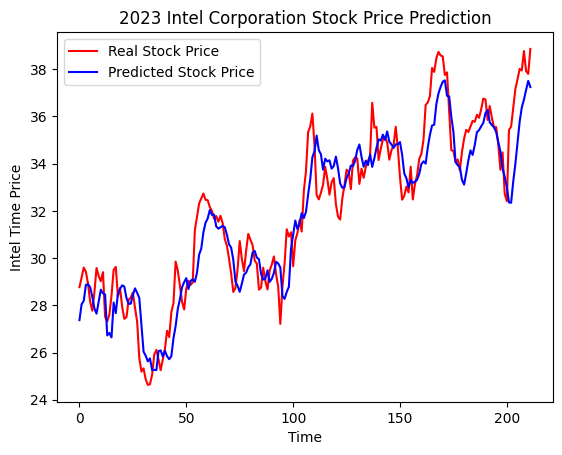

In [ ]:
# 繪出股價圖表
import matplotlib.pyplot as plt

plt.plot(Y_test, color="red", label="Real Stock Price")
plt.plot(X_test_pred_price, color="blue", label="Predicted Stock Price")
plt.title("2023 Intel Corporation Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Intel Time Price")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,X_test_pred_price)

1.5351460130202916